In [19]:
import pandas as pd
import numpy as np
import copy
import matplotlib as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [20]:
df_train_raw = pd.read_csv("train.csv")
df_test_raw = pd.read_csv("test.csv")

# 파일에서 읽어온 값들을 깊은 복사로 새로 객체를 만들어서 문제가 생기면 코드를 위의 원본데이터를 재활용한다.
df_train = copy.copy(df_train_raw)
df_test = copy.copy(df_test_raw)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#결측치
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

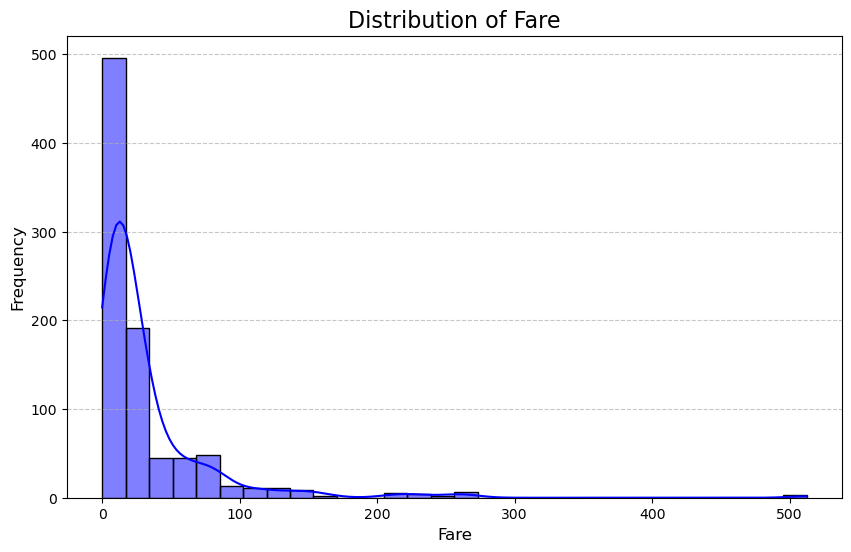

Fare의 최댓값: 512.3292


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램으로 Fare 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Fare'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Fare 열의 최댓값 확인
max_fare = df_train['Fare'].max()
print("Fare의 최댓값:", max_fare)

# # Fare 값을 50 단위로 나누어 Fare_Range 열 생성
# df_train['Fare_Range'] = (df_train['Fare'] // 50) * 50

# # 각 Fare_Range별 생존률과 승객 수 계산
# fare_analysis = df_train.groupby('Fare_Range').agg(
#     Survival_Rate=('Survived', 'mean'),  # 생존률
#     Passenger_Count=('Survived', 'size')  # 승객 수
# ).reset_index()

# # 결과 출력
# print(fare_analysis)

# # Fare 값을 조건에 따라 직접 변경
# df_train['Fare'] = df_train['Fare'].apply(lambda x: 1 if x < 50 else (2 if x <= 500 else 3))
# df_test['Fare'] = df_test['Fare'].apply(lambda x: 1 if x < 50 else (2 if x <= 500 else 3))

In [23]:
E_survival = df_train.groupby('Embarked')['Survived'].mean() * 100
print("탑승지역별 생존율 (%):")
print(E_survival)

탑승지역별 생존율 (%):
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [24]:
label_encoder = LabelEncoder()

df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_test['Sex'] = label_encoder.transform(df_test['Sex'])

In [25]:
# 'Age', 'Cabin','Name','Ticket',"Embarked" 열 제거 
df_train = df_train.drop(columns=[ 'Age', 'Cabin','Name','Ticket',"Embarked"])
df_test = df_test.drop(columns=[ 'Age', 'Cabin','Name','Ticket',"Embarked"])

df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,1,1,0,7.2500
1,2,1,1,0,1,0,71.2833
2,3,1,3,0,0,0,7.9250
3,4,1,1,0,1,0,53.1000
4,5,0,3,1,0,0,8.0500


In [26]:
sex_survival = df_train.groupby('Sex')['Survived'].mean() * 100
print("성별 생존율 (%):")
print(sex_survival)

pclass_survival = df_train.groupby('Pclass')['Survived'].mean() * 100
print("\nPclass별 생존율 (%):")
print(pclass_survival)
    
df_train.isnull().sum()
df_test.isnull().sum()

df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

성별 생존율 (%):
Sex
0    74.203822
1    18.890815
Name: Survived, dtype: float64

Pclass별 생존율 (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


C:\Users\pjw07\AppData\Local\Temp\ipykernel_7084\2887661507.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)


In [41]:
X_train = df_train.drop(['PassengerId', 'Survived'], axis=1)
y_train = df_train['Survived']

X_test = df_test.drop(['PassengerId', 'Survived'], axis=1, errors='ignore')


# 모델 1
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
#이거 0.76794

# 모델 2
# model = LogisticRegression(
#     max_iter=10000,      # 최대 반복 횟수
#     C=0.55,             # 규제 강도
#     tol=1e-5           # 수렴 기준
# )
# #이거 0.76315

# # 모델 3
# model = LogisticRegression(
#     max_iter=10000,
#     C = 0.1,
#     tol =1e-100
# )
# #이거 0.76315

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("예측 결과:", y_pred)

submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})

submission.to_csv('gender_submission.csv', index=False)

예측 결과: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
